In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
df=pd.read_csv("Desktop/blackFriday_train.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df1=df.copy()

In [5]:
df1.drop("User_ID",axis=1,inplace=True)

In [6]:
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df1["Gender"]=df1["Gender"].map({'M':1,'F':0})

In [8]:
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
df1.shape

(550068, 11)

In [10]:
df1.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
df1["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [12]:
df1["Product_Category_2"]=df["Product_Category_2"].fillna(df["Product_Category_2"].median())

In [13]:
df1["Product_Category_3"]=df["Product_Category_3"].fillna(df["Product_Category_3"].median())

In [14]:
df1.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [15]:
df1["Age"]=df1["Age"].str.replace('+','')

In [16]:
df1.head(50)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,9.0,14.0,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,9.0,14.0,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,14.0,1057
4,P00285442,1,55,16,C,4+,0,8,9.0,14.0,7969
5,P00193542,1,26-35,15,A,3,0,1,2.0,14.0,15227
6,P00184942,1,46-50,7,B,2,1,1,8.0,17.0,19215
7,P00346142,1,46-50,7,B,2,1,1,15.0,14.0,15854
8,P0097242,1,46-50,7,B,2,1,1,16.0,14.0,15686
9,P00274942,1,26-35,20,A,1,1,8,9.0,14.0,7871


In [17]:
df1["Stay_In_Current_City_Years"]=df1["Stay_In_Current_City_Years"].str.replace('+','')

In [18]:
df1.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,9.0,14.0,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,9.0,14.0,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,14.0,1057
4,P00285442,1,55,16,C,4,0,8,9.0,14.0,7969
5,P00193542,1,26-35,15,A,3,0,1,2.0,14.0,15227
6,P00184942,1,46-50,7,B,2,1,1,8.0,17.0,19215
7,P00346142,1,46-50,7,B,2,1,1,15.0,14.0,15854
8,P0097242,1,46-50,7,B,2,1,1,16.0,14.0,15686
9,P00274942,1,26-35,20,A,1,1,8,9.0,14.0,7871


In [19]:
df1["Age"].unique()

array(['0-17', '55', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
df1["Age"]=df1["Age"].map({'0-17':1, '55':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})

In [21]:
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,9.0,14.0,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,9.0,14.0,1422
3,P00085442,0,1,10,A,2,0,12,14.0,14.0,1057
4,P00285442,1,7,16,C,4,0,8,9.0,14.0,7969


In [22]:
df1['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [23]:
df1['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [24]:
df1["City_Category"]=df1["City_Category"].map({"A":1,"B":2,"C":3})

In [25]:
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,9.0,14.0,8370
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,1,2,0,12,9.0,14.0,1422
3,P00085442,0,1,10,1,2,0,12,14.0,14.0,1057
4,P00285442,1,7,16,3,4,0,8,9.0,14.0,7969


In [26]:
len(df1['Product_ID'].unique())

3631

In [27]:
df.shape

(550068, 12)

In [28]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df1['Product_ID']= label_encoder.fit_transform(df1['Product_ID']) 

df1['Product_ID'].unique() 


array([ 672, 2376,  852, ..., 3560, 3566, 3565])

In [29]:
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,672,0,1,10,1,2,0,3,9.0,14.0,8370
1,2376,0,1,10,1,2,0,1,6.0,14.0,15200
2,852,0,1,10,1,2,0,12,9.0,14.0,1422
3,828,0,1,10,1,2,0,12,14.0,14.0,1057
4,2734,1,7,16,3,4,0,8,9.0,14.0,7969


In [30]:
df1.dtypes

Product_ID                      int32
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [31]:
df1["Stay_In_Current_City_Years"]=df1["Stay_In_Current_City_Years"].astype("int")

In [32]:
df1.dtypes

Product_ID                      int32
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [33]:
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,672,0,1,10,1,2,0,3,9.0,14.0,8370
1,2376,0,1,10,1,2,0,1,6.0,14.0,15200
2,852,0,1,10,1,2,0,12,9.0,14.0,1422
3,828,0,1,10,1,2,0,12,14.0,14.0,1057
4,2734,1,7,16,3,4,0,8,9.0,14.0,7969


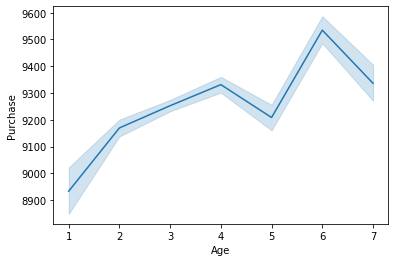

In [34]:
sns.lineplot(df1['Age'],df1["Purchase"],markers='#')

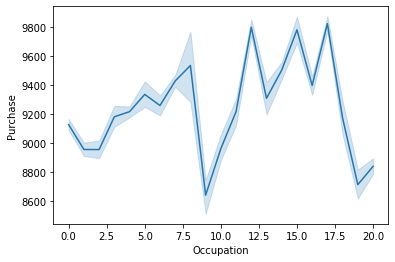

In [35]:
sns.lineplot(df1['Occupation'],df["Purchase"],markers='#')

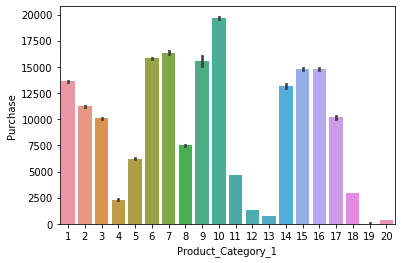

In [38]:
sns.barplot(df1['Product_Category_1'],df["Purchase"])

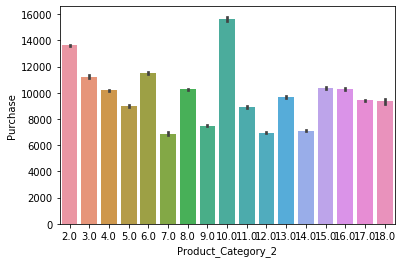

In [39]:
sns.barplot(df1['Product_Category_2'],df["Purchase"])

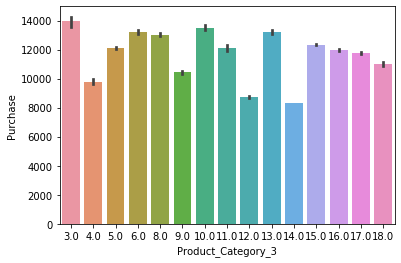

In [40]:
sns.barplot(df1['Product_Category_3'],df["Purchase"])

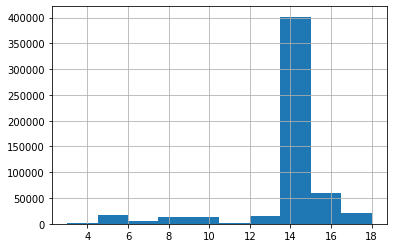

In [43]:
df1['Product_Category_3'].hist()

In [47]:
for i in df1 :
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


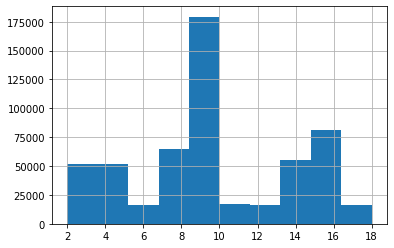

In [50]:
df1['Product_Category_2'].hist()

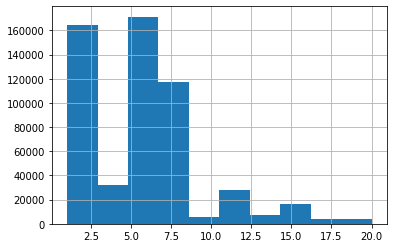

In [51]:
df1['Product_Category_1'].hist()

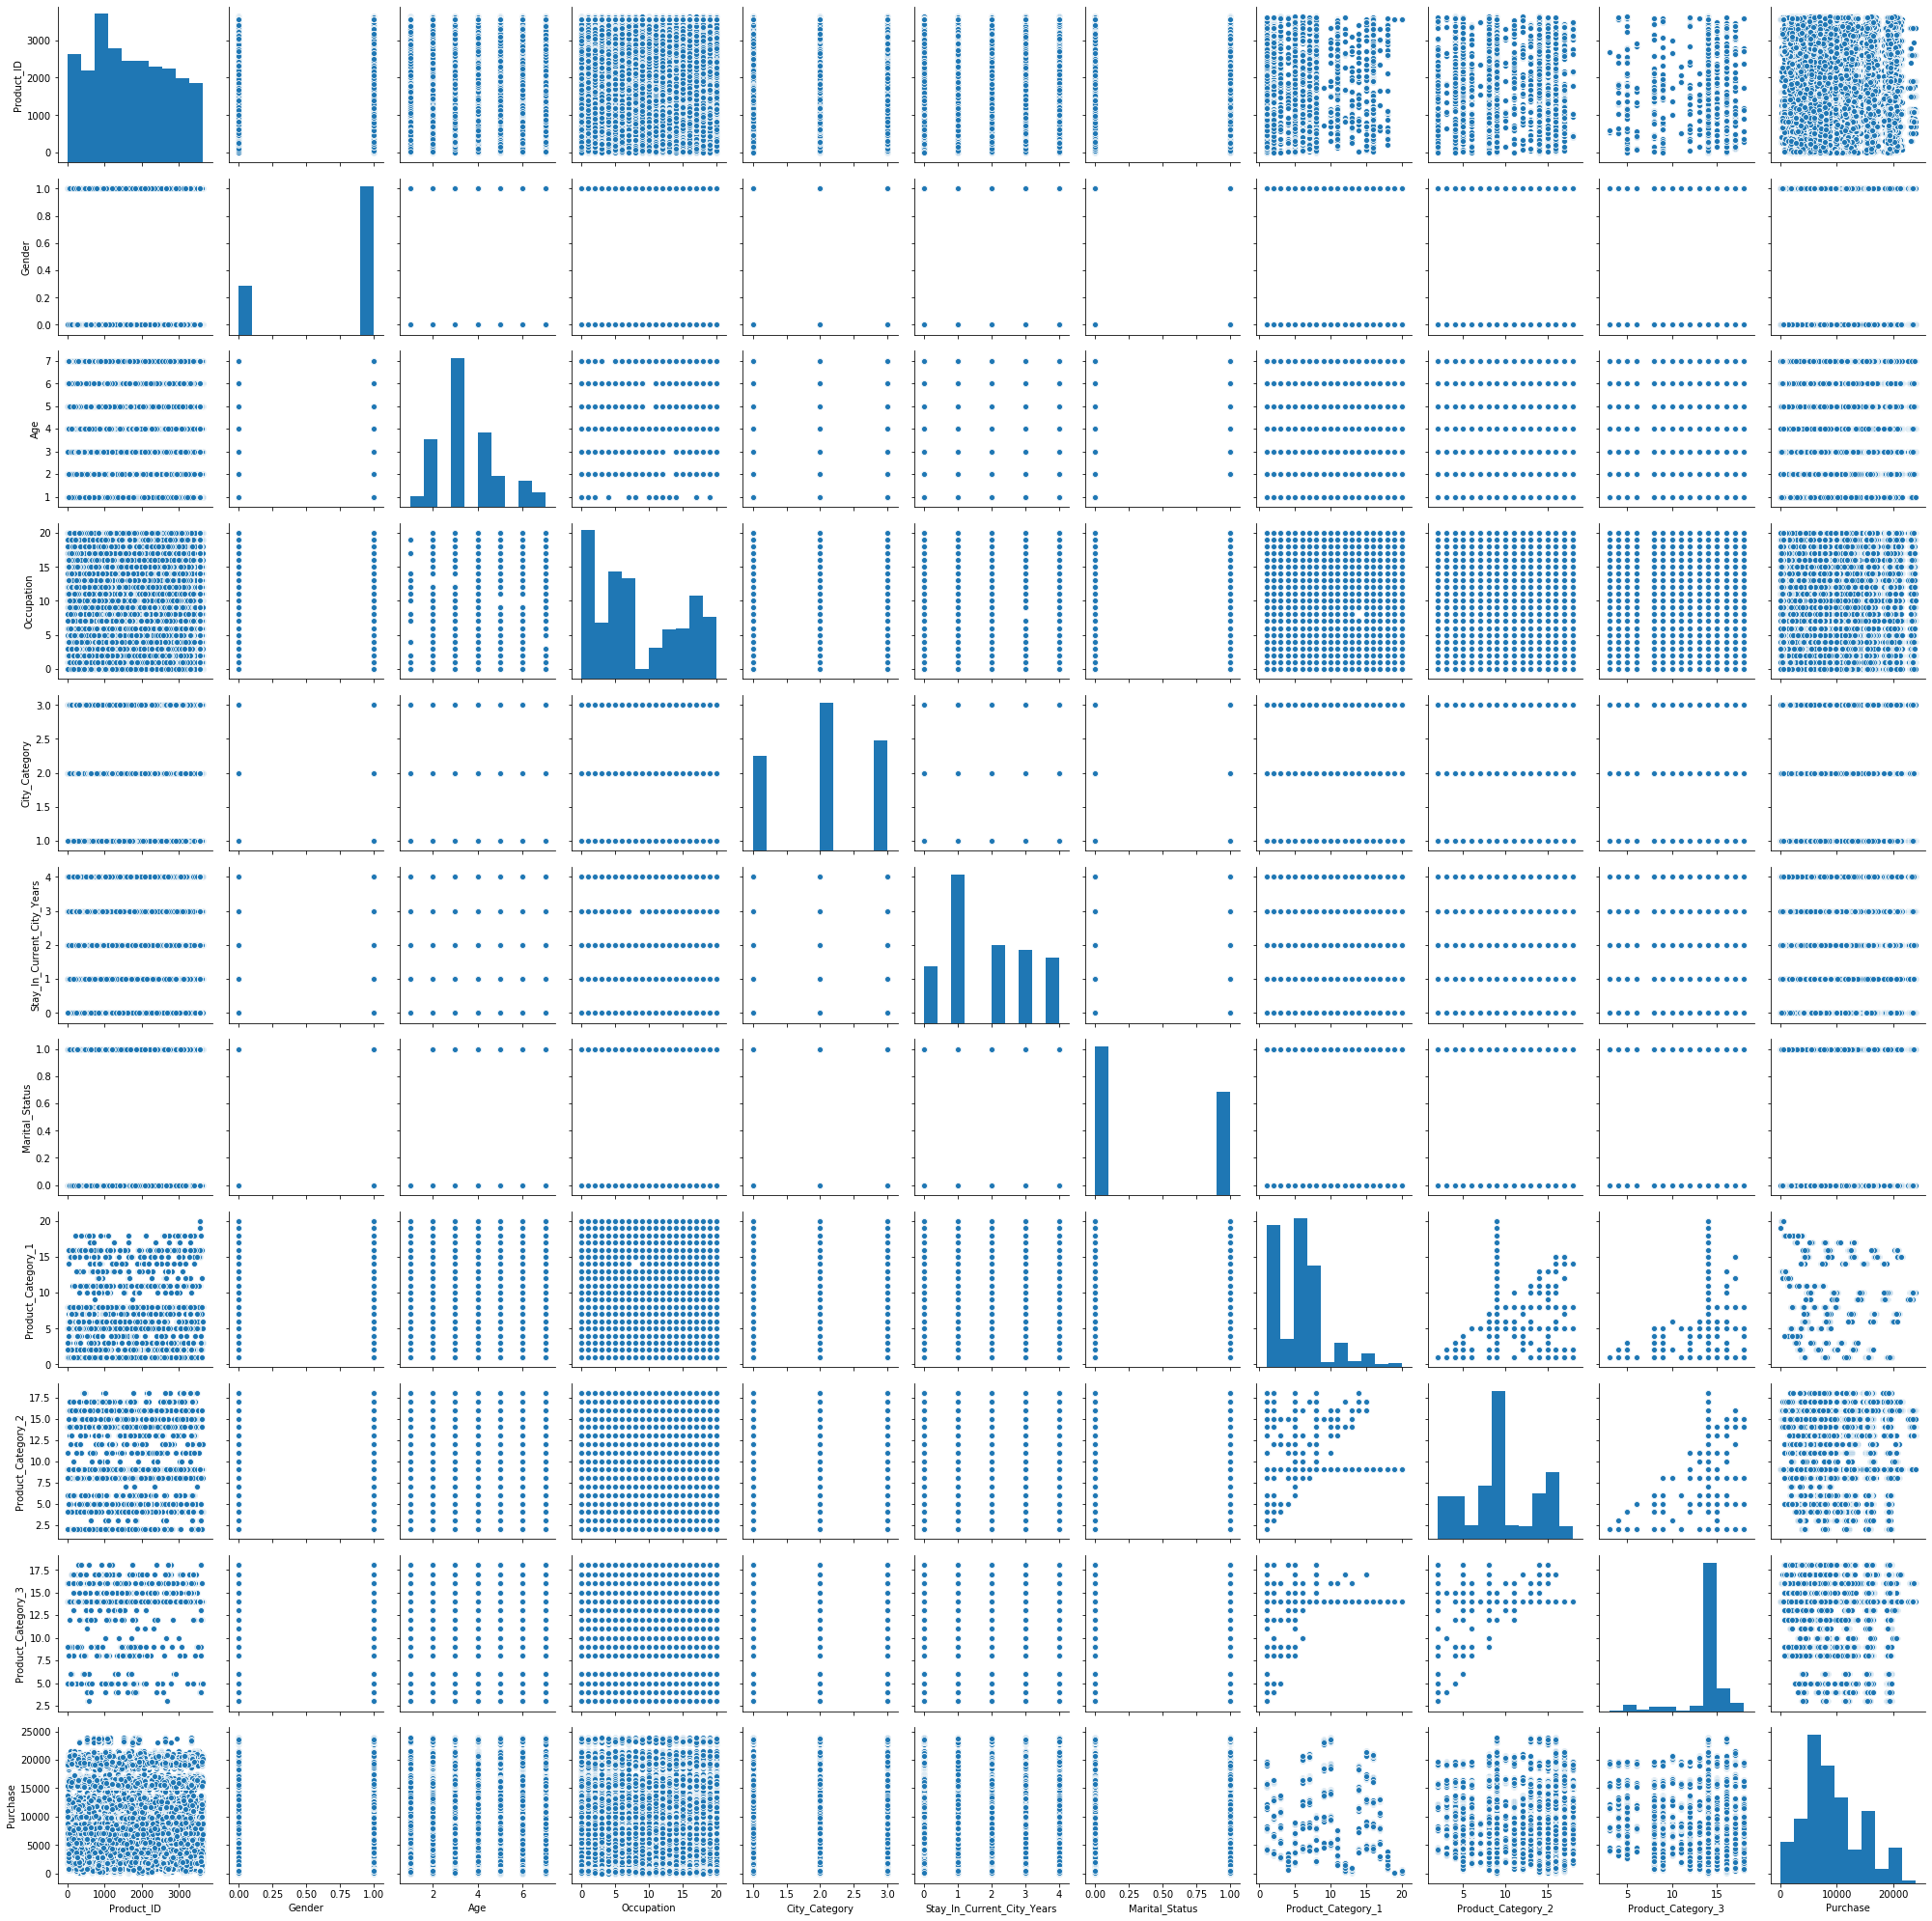

In [52]:
sns.pairplot(df1)

In [ ]:
sns.boxplot()